# Working with Missing Data in Pandas

In Pandas, missing values often arise from uncollected data or incomplete entries.

In Pandas, missing values are represented as:

+ **None**: A Python object commonly used to represent missing values in object-type arrays.
+ **NaN**: A special floating-point value from NumPy, which is recognized by all systems that use IEEE floating-point standards.

## Checking for Missing Values in Pandas DataFrame

For finding the missing values and handling them, Pandas gives us two convenient functions: **isnull()** and **notnull()**. 
They assist us in detecting if a value is NaN or not, which facilitates data cleaning and preprocessing in a DataFrame or Series.

1. Checking for Missing Values Using isnull()

**isnull()** returns a DataFrame of Boolean values, where True represents missing data (NaN).
This is handy if you want to find and fill missing data in a dataset.

In [3]:
# Importing pandas and numpy
import pandas as pd


# Sample DataFrame with missing values
d = {'First Score': [100, 90, None, 95],
        'Second Score': [30, 45, 56, None],
        'Third Score': [None, 40, 80, 98]}
df = pd.DataFrame(d)

# Checking for missing values using isnull()
mv = df.isnull()

print(mv)

   First Score  Second Score  Third Score
0        False         False         True
1        False         False        False
2         True         False        False
3        False          True        False


To use **NaN**, we have to call **Numpy** because Pandas relies on NumPy's implementation of NaN for missing values.

In [4]:
import pandas as pd
import numpy as np  # Import numpy to use np.nan

# Sample DataFrame with missing values
d = {'First Score': [100, 90, np.nan, 95],  # Use np.nan here
     'Second Score': [30, 45, 56, np.nan],   # Use np.nan here
     'Third Score': [np.nan, 40, 80, 98]}    # Use np.nan here

df = pd.DataFrame(d)

# Checking for missing values using isnull()
mv = df.isnull()

print(mv)

   First Score  Second Score  Third Score
0        False         False         True
1        False         False        False
2         True         False        False
3        False          True        False


In [ ]:
import pandas as pd


# Cleaning Data usind the "Titanic" dataset

Seaborn has a lot of datasets to practice with. So we'll use Titanic

## Getting the dataset

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")

Let's preview the dataset

In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


| Column         | Description |
|----------------|-------------|
| **survived**   | Indicates whether the passenger survived. `0 = No`, `1 = Yes`. |
| **pclass**     | Passenger class. `1 = First`, `2 = Second`, `3 = Third`. It's a proxy for socio-economic status. |
| **sex**        | Gender of the passenger (`male` or `female`). |
| **age**        | Age of the passenger in years. May contain `NaN` for missing values. |
| **sibsp**      | Number of siblings or spouses aboard the Titanic. |
| **parch**      | Number of parents or children aboard the Titanic. |
| **fare**       | Fare paid for the ticket. |
| **embarked**   | Port of embarkation (`C = Cherbourg`, `Q = Queenstown`, `S = Southampton`). |
| **class**      | A string version of `pclass` (`First`, `Second`, `Third`). |
| **who**        | Simplified description of person: `man`, `woman`, or `child`. |
| **adult_male** | Boolean indicating whether the passenger is an adult male (`True` or `False`). |
| **deck**       | The deck the passenger was on (`A`–`G`, may be `NaN`). |
| **embark_town  | Town the passenger embarked from (`Cherbourg`, `Queenstown`, `Southampton`). |
| **alive**      | String version of `survived` (`yes` or `no`). |
| **alone**      | Boolean indicating whether the passenger was alone (`True` if `sibsp + parch == 0`, else `False`). |

1. Checking for missing values

In [9]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

age            177
embarked         2
deck           688
embark_town      2
dtype: int64


Here, we see we have:
+ **age** has 177 missing entries.
+ **embarked** and **embark_town** each have 2.
+ **deck** is missing for the majority of passengers (688 out of 891).

## visualizing the missing entries

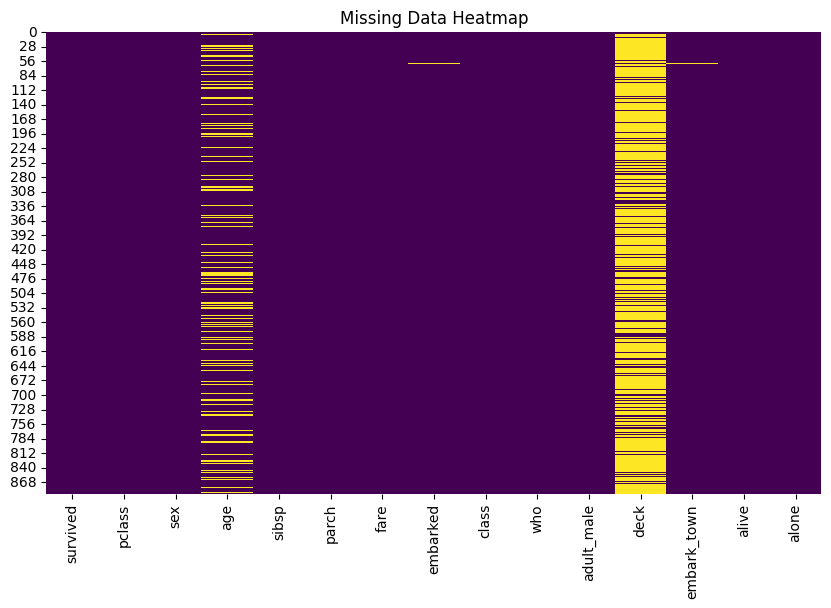

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

## code explanation

In [ ]:
```python
plt.figure(figsize=(10, 6))
```

+ This creates a blank figure for the plot.
+ **figsize=(10, 6)** sets the width and height of the plot in inches.

In [ ]:
```python
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
```

+ **df.isnull()** creates a DataFrame of the same shape as **df**, where each cell is:
  + **True** if the original value is missing (**NaN**)
  + **False** otherwise
+ **sns.heatmap(...)** visualizes this boolean DataFrame:
  + Missing values (**True**) are shown in color.
  + **cbar=False** hides the color bar on the side (optional).
  + **cmap="viridis"** sets the color palette (you can try others like **"magma"**, **"coolwarm"**).

In [ ]:
```python
plt.title("Missing Data Heatmap")
```

In [ ]:
+ Adds a title to the plot

In [ ]:
```python
plt.show()
```

In [ ]:
+ Renders the heatmap so you can see it.

2. Check for Duplicates

**df.duplicated()** returns a boolean series of the same length as the DataFrame df. Each entry will be True if that row is a duplicate of a previous row, and False if it is not.

In [16]:
duplicates = df.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicates.sum()}")

# Optionally, view the duplicated rows
print("Duplicated rows:\n", df[duplicates])

Number of duplicated rows: 107
Duplicated rows:
      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
47          1       3  female   NaN      0      0   7.7500        Q   Third   
76          0       3    male   NaN      0      0   7.8958        S   Third   
77          0       3    male   NaN      0      0   8.0500        S   Third   
87          0       3    male   NaN      0      0   8.0500        S   Third   
95          0       3    male   NaN      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
870         0       3    male  26.0      0      0   7.8958        S   Third   
877         0       3    male  19.0      0      0   7.8958        S   Third   
878         0       3    male   NaN      0      0   7.8958        S   Third   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   

  

To drop duplicates
+ **drop_duplicates()** removes duplicates

In [17]:
df = df.drop_duplicates()

In [18]:
duplicates = df.duplicated()

# Display the number of duplicated rows
print(f"Number of duplicated rows: {duplicates.sum()}")

# Optionally, view the duplicated rows
print("Duplicated rows:\n", df[duplicates])

Number of duplicated rows: 0
Duplicated rows:
 Empty DataFrame
Columns: [survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, alone]
Index: []


3. Questions

+ Who survived more — men or women?

4. Check for Outliers
Some numerical columns like age and fare could have outliers that might affect our analysis.

Actions:
Handle outliers: We’ll check if the age or fare columns have extreme values and decide whether to trim or adjust them.

5. Feature Engineering
We might want to create new columns from existing ones to make the analysis easier.

Actions:
family_size: We can create a new feature by combining sibsp (siblings/spouses aboard) and parch (parents/children aboard) into one column: family_size = sibsp + parch.

6. Data Type Conversions
We need to check if any columns need to be converted to the appropriate data type.

Actions:
Ensure numerical columns like age, fare, sibsp, and parch are of numeric type.

Convert categorical columns like sex, embarked, and alive to appropriate numeric or categorical types.

7. Dropping Irrelevant or Unnecessary Columns
Some columns may not contribute significantly to the analysis, or they may not be needed for our final model.

Actions:
Consider dropping columns like:

deck (if it's mostly missing or irrelevant)

who (already represented by sex)

class (since it’s redundant with pclass unless you want to keep it as an additional feature)